<a href="https://colab.research.google.com/github/SaraAcet/Beslenme.php/blob/main/dizi%C3%B6neriiiiiii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install mlxtend


In [ ]:
"""
veri_yolu = '/content/drive/MyDrive/diziii.csv'
df = pd.read_csv(veri_yolu)
"""


import pandas as pd
veri_yolu = '/content/drive/MyDrive/diziii.csv'
df = pd.read_csv(veri_yolu)

In [ ]:
df = df[['show_id', 'title', 'listed_in']].dropna()
df['listed_in'] = df['listed_in'].apply(lambda x: [genre.strip() for genre in x.split(',')])


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genre_matrix = pd.DataFrame(mlb.fit_transform(df['listed_in']), columns=mlb.classes_, index=df['title'])


In [ ]:
"""
frequent_genres = apriori(genre_matrix, min_support=0.05, use_colnames=True)
rules_apriori = association_rules(frequent_genres, metric="lift", min_threshold=1)
"""

from mlxtend.frequent_patterns import apriori, association_rules # Import apriori and association_rules from mlxtend

frequent_genres = apriori(genre_matrix, min_support=0.05, use_colnames=True)
rules_apriori = association_rules(frequent_genres, metric="lift", min_threshold=1)

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
def tur_oner(tur_adi, kurallar, top_n=5):
    ...


In [ ]:
def draw_genre_graph(rules, top_n=20):
    ...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

veri_yolu = '/content/drive/MyDrive/diziii.csv'
df = pd.read_csv(veri_yolu)

# İlk 5 satırı görelim
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:


# Gerekli sütunları al ve boş olanları temizle
df_clean = df[['show_id', 'title', 'listed_in']].dropna()

# Türleri liste haline getiriyoruz (örneğin: "Dramas, Thrillers" -> ["Dramas", "Thrillers"])
df_clean['listed_in'] = df_clean['listed_in'].apply(lambda x: [genre.strip() for genre in x.split(',')])

# Kontrol edelim
df_clean.head()


,show_id,title,listed_in
0,s1,Dick Johnson Is Dead,[Documentaries]
1,s2,Blood & Water,"[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,Ganglands,"[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,Jailbirds New Orleans,"[Docuseries, Reality TV]"
4,s5,Kota Factory,"[International TV Shows, Romantic TV Shows, TV..."


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
genre_matrix = pd.DataFrame(mlb.fit_transform(df_clean['listed_in']),
                            columns=mlb.classes_,
                            index=df_clean['title'])

# Kontrol edelim
genre_matrix.head()


,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Blood & Water,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
Ganglands,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
Jailbirds New Orleans,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kota Factory,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Apriori algoritmasını uygula (destek eşiği %5 olarak belirlendi)
frequent_genres = apriori(genre_matrix, min_support=0.05, use_colnames=True)

# Oluşan kuralları hesapla (Lift >= 1 olsun, yani anlamlı ilişkiler)
rules_apriori = association_rules(frequent_genres, metric="lift", min_threshold=1)

# İlk birkaç kuralı görelim
rules_apriori[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head()


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,support,confidence,lift
0,(Comedies),(Dramas),0.057000,0.299881,1.088194
1,(Dramas),(Comedies),0.057000,0.206840,1.088194
2,(Comedies),(International Movies),0.091291,0.480287,1.537022
3,(International Movies),(Comedies),0.091291,0.292151,1.537022
4,(Independent Movies),(Dramas),0.066765,0.777778,2.822369


In [ ]:
from mlxtend.frequent_patterns import fpgrowth

frequent_genres_fp = fpgrowth(genre_matrix, min_support=0.05, use_colnames=True)
rules_fpgrowth = association_rules(frequent_genres_fp, metric="lift", min_threshold=1)

# İlk birkaç FP-Growth kuralı
rules_fpgrowth[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head()


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,support,confidence,lift
0,(International TV Shows),(TV Dramas),0.058363,0.380459,4.391483
1,(TV Dramas),(International TV Shows),0.058363,0.673657,4.391483
2,(Dramas),(International Movies),0.168389,0.611042,1.955469
3,(International Movies),(Dramas),0.168389,0.538881,1.955469
4,(Independent Movies),(Dramas),0.066765,0.777778,2.822369


In [ ]:
def tur_oner(tur_adi, kurallar, top_n=5):
    tur_adi = frozenset([tur_adi])  # set olarak kontrol edebilmek için
    eslesen_kurallar = kurallar[kurallar['antecedents'] == tur_adi]
    eslesen_kurallar = eslesen_kurallar.sort_values(by='lift', ascending=False)

    if eslesen_kurallar.empty:
        print(f"'{list(tur_adi)[0]}' türüyle doğrudan eşleşen bir öneri bulunamadı.")
    else:
        print(f"🎬 '{list(tur_adi)[0]}' türünü izleyen kullanıcılar ayrıca şu türleri de seviyor:\n")
        for i, row in eslesen_kurallar.head(top_n).iterrows():
            for sonuc in row['consequents']:
                print(f"👉 {sonuc} (Confidence: {row['confidence']:.2f}, Lift: {row['lift']:.2f})")


In [ ]:
tur_oner("Comedies", rules_apriori)


🎬 'Comedies' türünü izleyen kullanıcılar ayrıca şu türleri de seviyor:

👉 International Movies (Confidence: 0.48, Lift: 1.54)
👉 Dramas (Confidence: 0.30, Lift: 1.09)


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_genre_graph(rules, top_n=20):
    G = nx.DiGraph()
    top_rules = rules.sort_values(by='lift', ascending=False).head(top_n)

    for _, rule in top_rules.iterrows():
        for antecedent in rule['antecedents']:
            for consequent in rule['consequents']:
                G.add_edge(antecedent, consequent, weight=rule['lift'])

    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=0.5, seed=42)
    edge_labels = nx.get_edge_attributes(G, 'weight')

    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=12, font_weight='bold', arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v:.2f}" for k, v in edge_labels.items()}, font_size=10)
    plt.title("🎞️ Türler Arası Birliktelik Ağı (Top 20 Kural)")
    plt.axis('off')
    plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127902 (\N{FILM FRAMES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


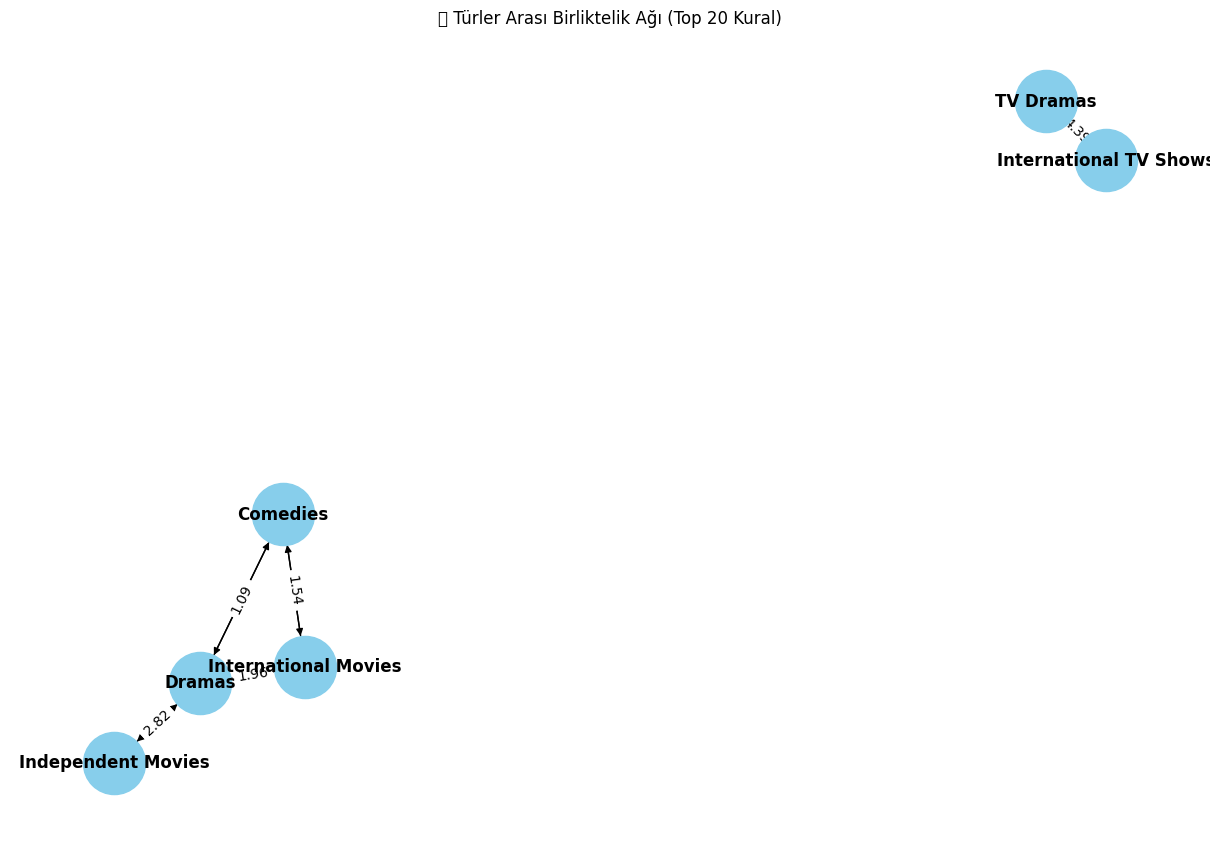

In [ ]:
draw_genre_graph(rules_apriori)


In [ ]:
"""

# Sadece anlamlı sütunları kaydediyoruz
rules_apriori[['antecedents', 'consequents', 'support', 'confidence', 'lift']].to_csv('/content/drive/MyDrive/film_dataset/kurallar_apriori.csv', index=False)

# FP-Growth için de aynısı yapılabilir
# rules_fpgrowth[['antecedents', 'consequents', 'support', 'confidence', 'lift']].to_csv('/content/drive/MyDrive/film_dataset/kurallar_fpgrowth.csv', index=False)


"""


import os

# Create the directory if it doesn't exist
os.makedirs('/content/drive/MyDrive/film_dataset', exist_ok=True)

# Now save the DataFrame to CSV
rules_apriori[['antecedents', 'consequents', 'support', 'confidence', 'lift']].to_csv('/content/drive/MyDrive/film_dataset/kurallar_apriori.csv', index=False)

In [ ]:
#readme
#widgets etiketinden dolayı yorum satırına alındı


"""


import ipywidgets as widgets
from IPython.display import display

# Mevcut türlerden seçim yapılabilmesi için listeyi alalım
turler = sorted(mlb.classes_)

# Açılır menü (drop-down)
secim = widgets.Dropdown(
    options=turler,
    description='Tür Seç:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# Buton
buton = widgets.Button(description="Önerileri Göster")
out = widgets.Output()

def on_button_clicked(b):
    with out:
        out.clear_output()
        tur_oner(secim.value, rules_apriori)

buton.on_click(on_button_clicked)

# Göster
display(secim, buton, out)


"""

Dropdown(description='Tür Seç:', layout=Layout(width='50%'), options=('Action & Adventure', 'Anime Features', …

Button(description='Önerileri Göster', style=ButtonStyle())

Output()